In [1]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_sources_X import Scalar_source_X

number of processors: 8
total memory        : 15.6 Gb
available memory    : 24 %
max frequency       : 2995 GHz


In [2]:
%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize']=(7,5)
rcParams['figure.dpi']=125

## Real index of refraction

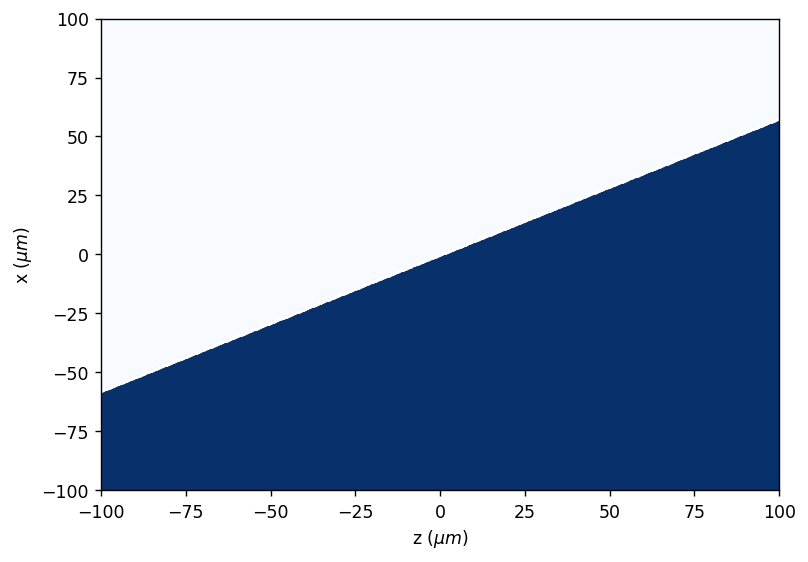

In [3]:
x0 = np.linspace(-100 * um, 100 * um, 2048)
z0 = np.linspace(-100 * um, 100 * um, 2048)

wavelength = 5 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=100 * um, w0=15 * um, theta=0 * degrees)

u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
u1.incident_field(u0)
u1.semi_plane(r0=(0, 0), refraction_index=1.5, angle=60 * degrees)

u1.draw_refraction_index()

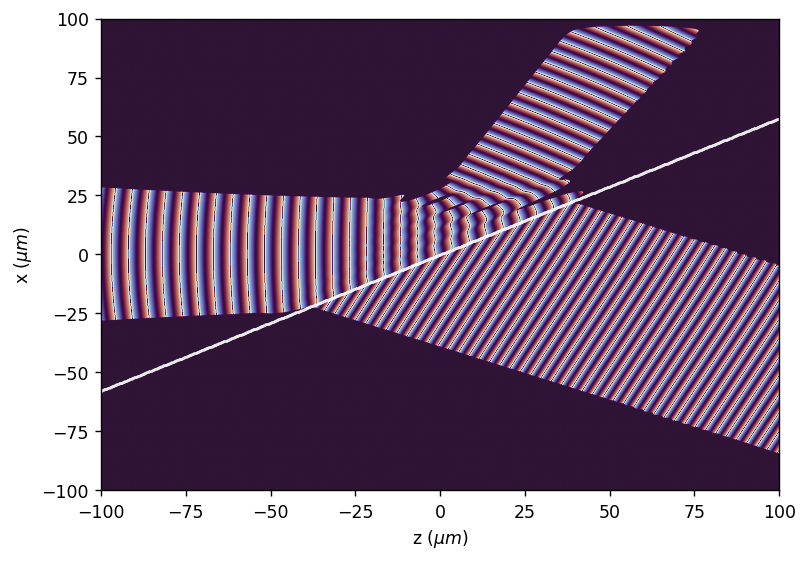

In [4]:
u1.WPM(verbose=False)
u1.draw(kind='phase', draw_borders=True);

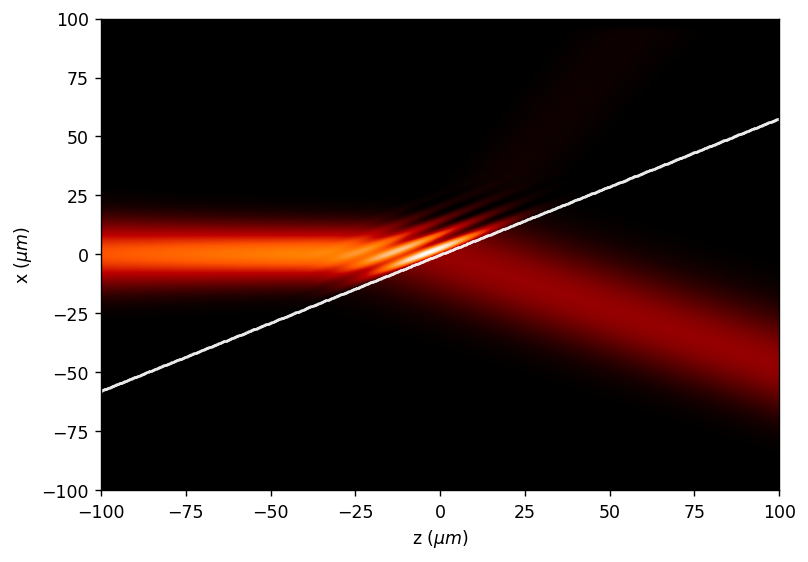

In [5]:
u1.draw(kind='intensity', logarithm=True, draw_borders=True);

## Complex refractive index

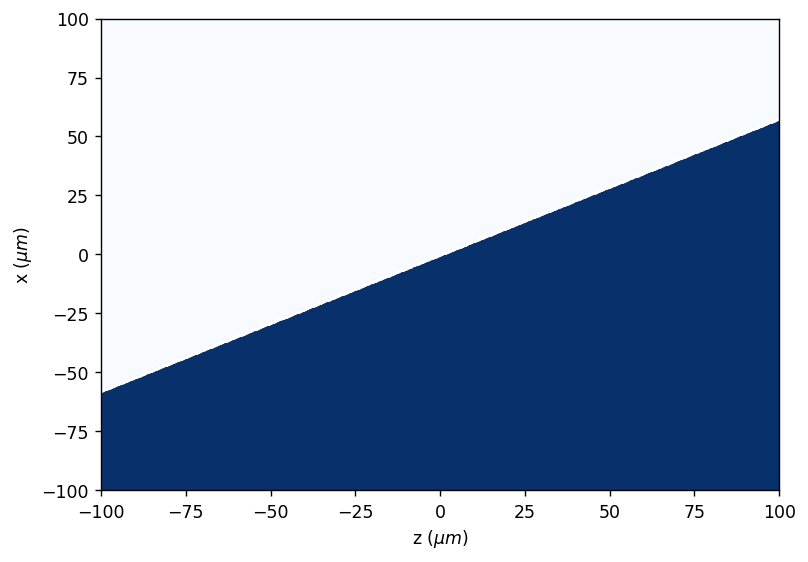

In [99]:
x0 = np.linspace(-100 * um, 100 * um, 2048)
z0 = np.linspace(-100 * um, 100 * um, 2048)

wavelength = 5 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=100 * um, w0=15 * um, theta=0 * degrees)

u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
u1.incident_field(u0)
u1.semi_plane(r0=(0, 0), refraction_index=0.001+1j*5, angle=60 * degrees)

u1.draw_refraction_index()

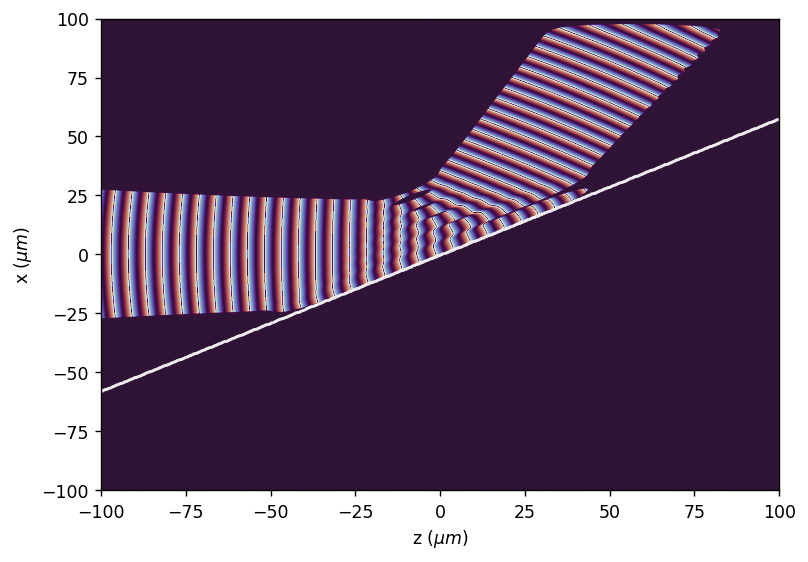

In [100]:
u1.WPM(verbose=False)
u1.draw(kind='phase', draw_borders=True);

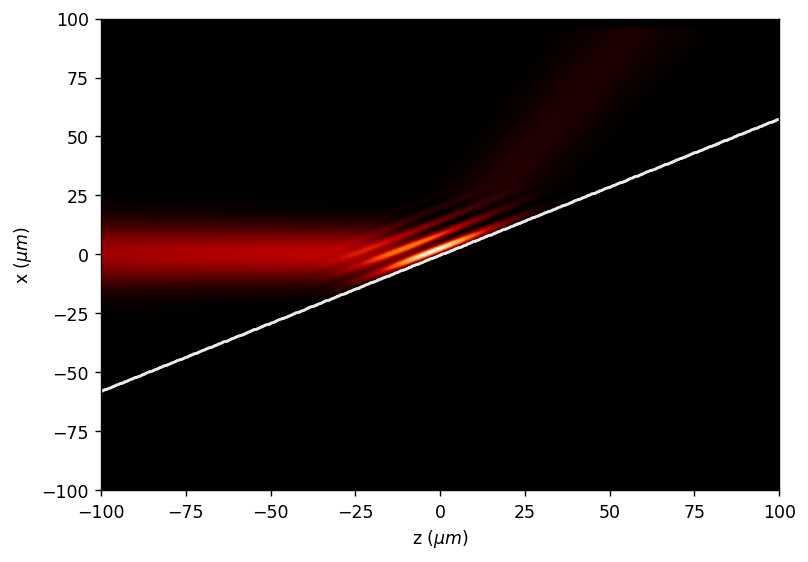

In [101]:
u1.draw(kind='intensity', draw_borders=True);

## Spherical mirror

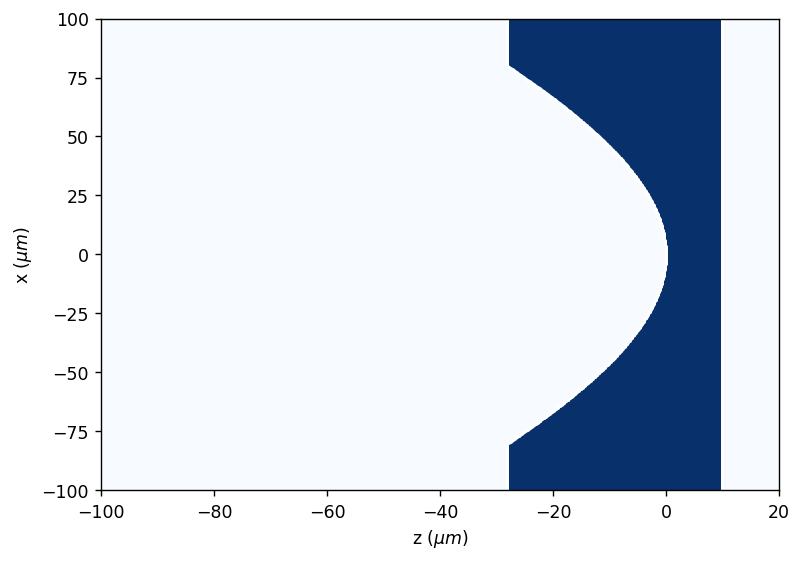

In [85]:
x0 = np.linspace(-100 * um, 100 * um, 2048)
z0 = np.linspace(-100 * um, 20 * um, 2048)

wavelength = 4 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=z0[0] * um, w0=80 * um, theta=0 * degrees)

u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
u1.incident_field(u0)

rho_steps = 100
r = .1*mm
z_offset = r
sag = lambda rho: -(np.sqrt(r**2 + rho**2)-z_offset)
rho_pts = np.linspace(-80*um,80*um,rho_steps)

surf1 = np.transpose(np.array([rho_pts, np.array([sag(rho) for rho in rho_pts])]))
surf2 = np.transpose(np.array([rho_pts, np.full(rho_steps,10*um)]))

u1.mask_from_array(
    r0 =(0,0),
    refraction_index=0.0001+5*1j,
    array1=surf1,
    array2=surf2,
    angle=0*degrees
    #has_draw=True
)

u1.draw_refraction_index()

In [86]:
u1.BPM(verbose=True) #,num_processors=8)

Time = 0.56 s, time/loop = 0.2744 ms


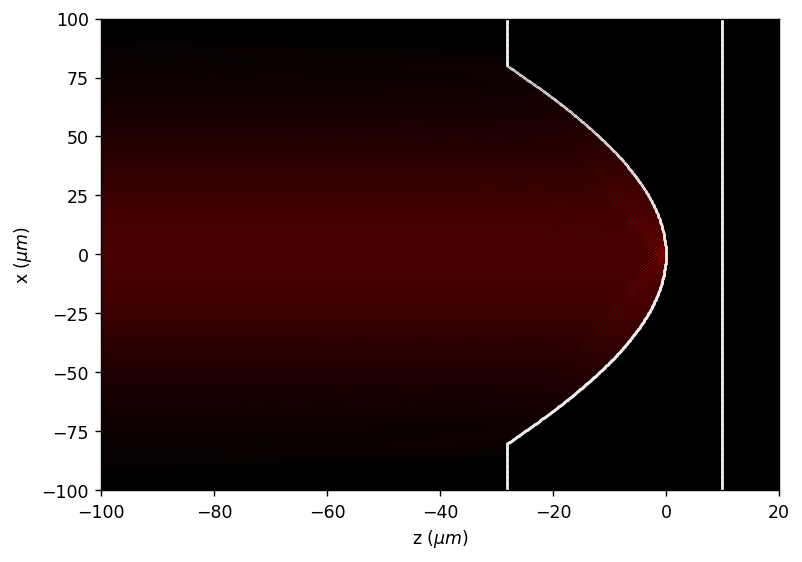

In [87]:
u1.draw(kind='intensity', draw_borders=True);

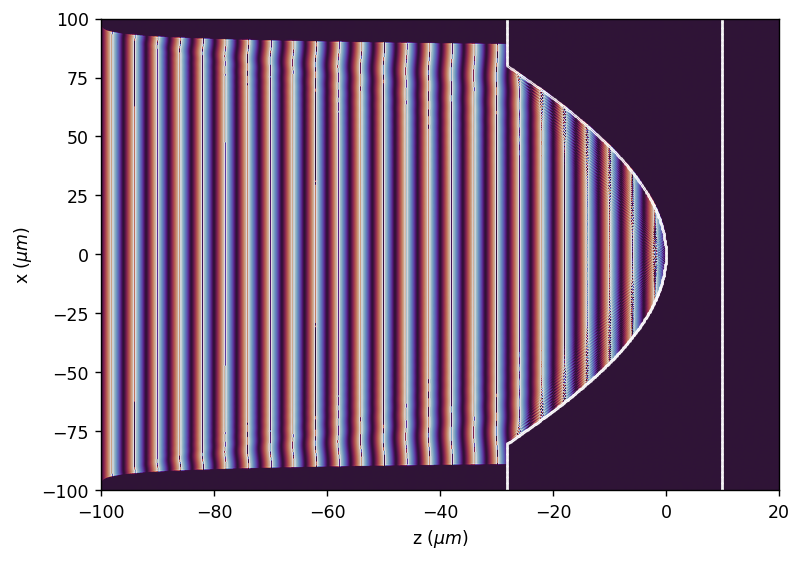

In [88]:
u1.draw(kind='phase', draw_borders=True);

## Parabolic Mirror

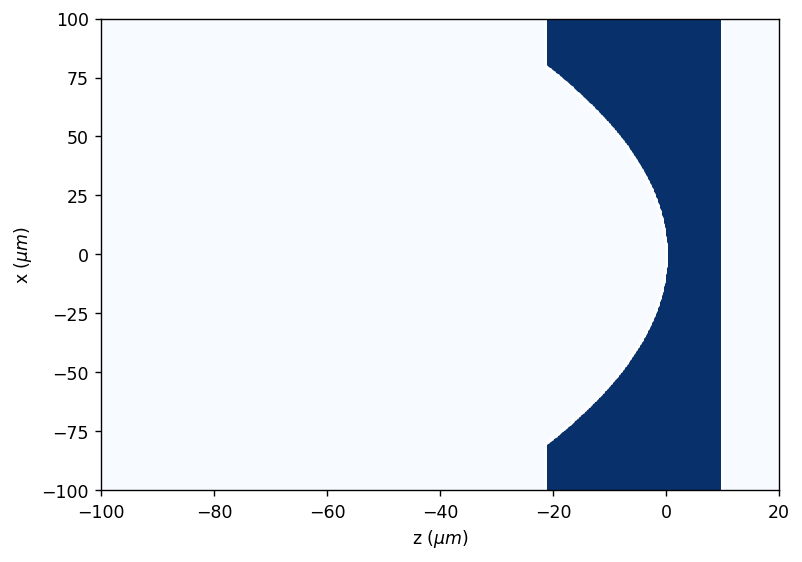

In [92]:
x0 = np.linspace(-100 * um, 100 * um, 2048)
z0 = np.linspace(-100 * um, 20 * um, 2048)

wavelength = 4 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=z0[0] * um, w0=80 * um, theta=0 * degrees)

u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
u1.incident_field(u0)

rho_steps = 100
r = .15*mm
z_offset = r
sag = lambda rho: -(r*(1 + 0.5*(rho/r)**2)-z_offset)
rho_pts = np.linspace(-80*um,80*um,rho_steps)

surf1 = np.transpose(np.array([rho_pts, np.array([sag(rho) for rho in rho_pts])]))
surf2 = np.transpose(np.array([rho_pts, np.full(rho_steps,10*um)]))

u1.mask_from_array(
    r0 =(0,0),
    refraction_index=0.0001+5*1j,
    array1=surf1,
    array2=surf2,
    angle=0*degrees
    #has_draw=True
)

u1.draw_refraction_index()

In [93]:
# u1.RS(num_processors=8)
u1.BPM(verbose=False)

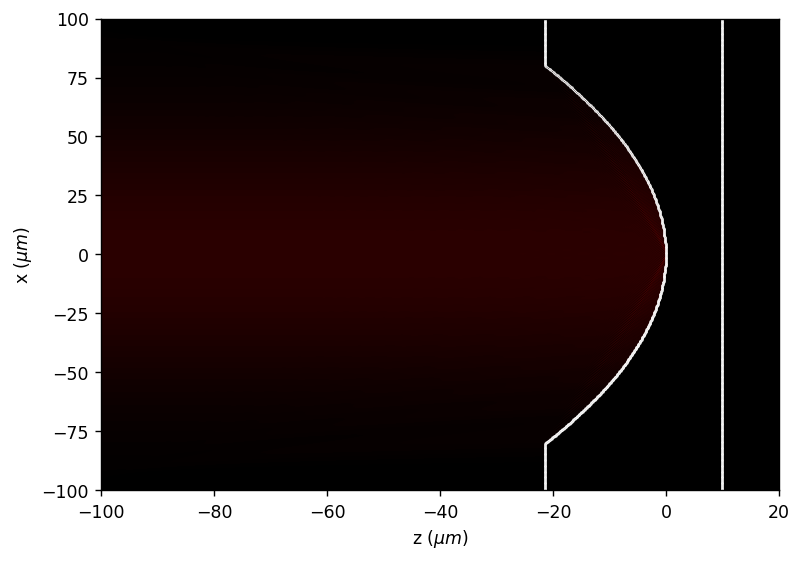

In [94]:
u1.draw(kind='intensity', draw_borders=True);

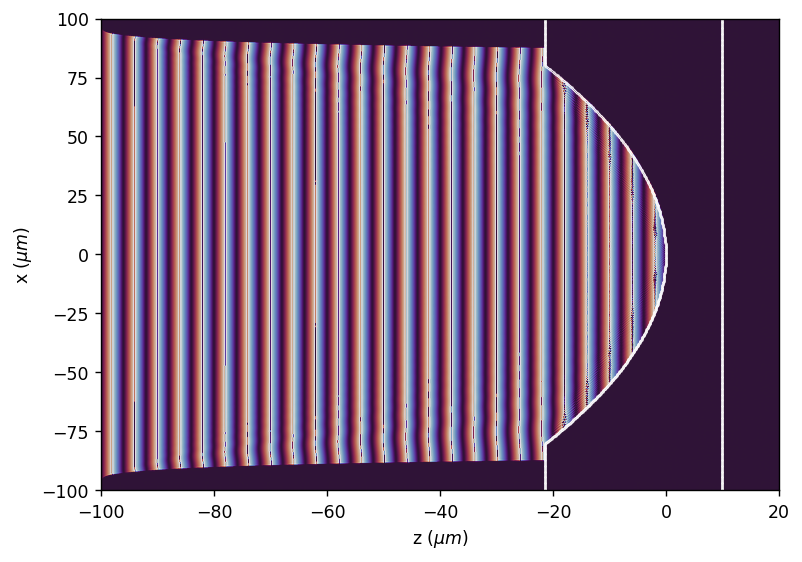

In [95]:
u1.draw(kind='phase', draw_borders=True);